In [1]:
import cv2
import matplotlib.pyplot as plt

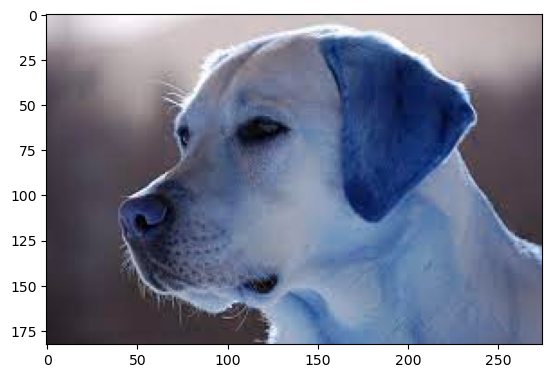

In [2]:
image = cv2.imread('dog.jpg',1)
plt.imshow(image)

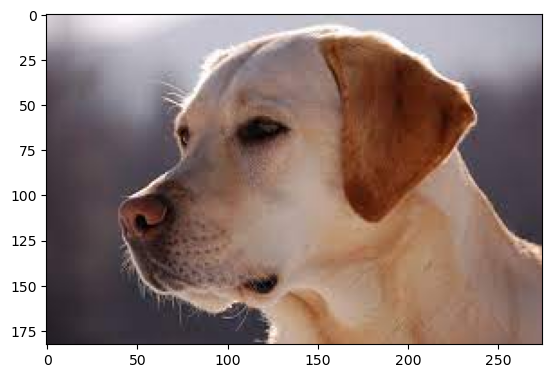

In [3]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [4]:
net=cv2.dnn.readNet('yolov3-tiny.weights','yolov3.cfg.crdownload')
classes=[]
with open ('coco.names','r')as f:
    classes=[line.strip() for line in f.readlines()]
    print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
layer_names=net.getLayerNames()
print(layer_names)

('conv_0', 'bn_0', 'leaky_1', 'pool_1', 'conv_2', 'bn_2', 'leaky_3', 'pool_3', 'conv_4', 'bn_4', 'leaky_5', 'pool_5', 'conv_6', 'bn_6', 'leaky_7', 'pool_7', 'conv_8', 'bn_8', 'leaky_9', 'pool_9', 'conv_10', 'bn_10', 'leaky_11', 'pool_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'conv_15', 'permute_16', 'yolo_16', 'identity_17', 'conv_18', 'bn_18', 'leaky_19', 'upsample_19', 'concat_20', 'conv_21', 'bn_21', 'leaky_22', 'conv_22', 'permute_23', 'yolo_23')


In [6]:
output_layer=[layer_names[i-1] for i in net.getUnconnectedOutLayers()]
print(output_layer)

['yolo_16', 'yolo_23']


In [7]:
rgb_image.shape


(183, 275, 3)

In [8]:
height,width,_=rgb_image.shape
print(height,width)

183 275


In [9]:
blob = cv2.dnn.blobFromImage(rgb_image, 0.003,(128,128),(0,0,0),True)
print(blob)

[[[[0.651      0.642      0.63       ... 0.528      0.525
    0.531     ]
   [0.645      0.636      0.624      ... 0.528      0.528
    0.531     ]
   [0.636      0.62700003 0.615      ... 0.531      0.528
    0.534     ]
   ...
   [0.114      0.117      0.12       ... 0.315      0.327
    0.333     ]
   [0.111      0.114      0.117      ... 0.315      0.327
    0.333     ]
   [0.111      0.114      0.117      ... 0.315      0.327
    0.333     ]]

  [[0.63       0.621      0.609      ... 0.492      0.486
    0.48000002]
   [0.624      0.615      0.603      ... 0.495      0.486
    0.48000002]
   [0.615      0.606      0.594      ... 0.495      0.489
    0.483     ]
   ...
   [0.093      0.096      0.099      ... 0.33900002 0.345
    0.342     ]
   [0.09       0.093      0.096      ... 0.33900002 0.345
    0.342     ]
   [0.09       0.093      0.096      ... 0.33900002 0.345
    0.342     ]]

  [[0.651      0.642      0.63       ... 0.492      0.489
    0.489     ]
   [0.645      0.636

In [10]:
net.setInput(blob)
outs=net.forward(output_layer)
print(len(outs))
print(outs)

2
(array([[0.19149779, 0.16988249, 0.6110426 , ..., 0.        , 0.        ,
        0.        ],
       [0.12623009, 0.14110507, 0.7215794 , ..., 0.        , 0.        ,
        0.        ],
       [0.12135928, 0.15740006, 2.9881983 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.8175569 , 0.84267694, 0.72659254, ..., 0.        , 0.        ,
        0.        ],
       [0.8534382 , 0.8497137 , 0.9632497 , ..., 0.        , 0.        ,
        0.        ],
       [0.89669466, 0.8490466 , 2.3719425 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.07226594, 0.06751905, 0.06838164, ..., 0.        , 0.        ,
        0.        ],
       [0.07780062, 0.07569636, 0.10235053, ..., 0.        , 0.        ,
        0.        ],
       [0.04722302, 0.07435546, 0.3452542 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9400638 , 0.9230047 , 0.05517057, ..., 0.        , 0.        ,
        0.        ],
       [0.931824

[[19, 6, 256, 163], [4, 8, 248, 174], [21, 12, 252, 166]]
[0.38625219464302063, 0.43887144327163696, 0.7581666707992554]


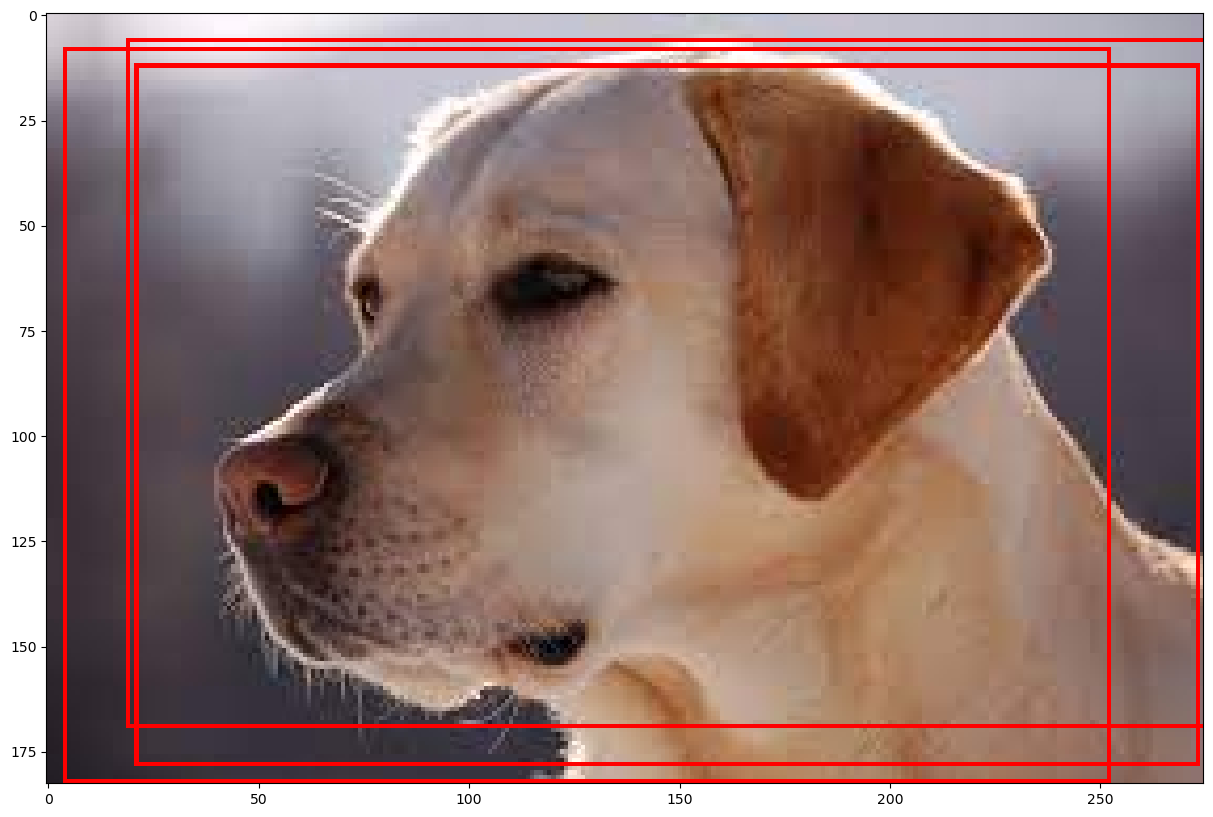

In [11]:
import numpy as np
class_ids=[]
boxes=[]
confidences=[]
for out in outs:
    for det in out:
        scores=det[4:]
        class_id=np.argmax(scores)
        cof=scores[class_id]
        if cof>0.2:
            cx = int(det[0]*width)
            cy = int(det[1]*height)
            w=int(det[2]*width)
            h=int(det[3]*height)
            x=int(cx-w/2)
            y=int(cy-h/2)
            boxes.append([x,y,w,h])
            confidences.append(float(cof))
            class_ids.append(class_id)
            cv2.rectangle(rgb_image, (x,y), (x+w, y+h), (255,0,0),1)
plt.figure(figsize=(20,10))
plt.imshow(rgb_image)
print(boxes)
print(confidences)

In [12]:
n_det = len(boxes)
print(n_det)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.22, 0.3)
print(indexes)
for i in range(n_det):
    if i in indexes:
        x, y, w, h = boxes[i]
        print(x, y, w, h)
        label = str(classes[class_ids[i]])
        print(label)
        cv2.rectangle(rgb_image, (x, y), (x+h, y+w), (255, 0, 0), 1)
        cv2.putText(rgb_image, label, (x, y+30), cv2.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), 1)

plt.imshow(rgb_image)


3
[2]
21 12 252 166


IndexError: list index out of range